#Import the required libraries

In [ ]:
# Import the data analysis libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from termcolor import colored

# Import the machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

#Load the data form Github

In [ ]:
train_data = "https://raw.githubusercontent.com/7PAM2015-0105-2023-Group15/Kaggle-Challenge/main/train.csv"
df_train = pd.read_csv(train_data)
df_train.head()
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df_train.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap="ocean")\
                     .bar(subset=["max"], color='#0080ff')\
                     .bar(subset=["mean",], color='#ffff00')\
                     .set_properties(**{'color': 'black', 'text-align': 'center'})

,count,mean,std,min,25%,50%,75%,max
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000


In [ ]:
test_data = "https://raw.githubusercontent.com/7PAM2015-0105-2023-Group15/Kaggle-Challenge/main/test.csv"
df_test = pd.read_csv(test_data)
df_test1 = df_test.copy()
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


#Data Description

Data Cleaning


1.   Which features are categorical and which are numerical?
2.   Available Data Types?
3.   None, blank or empty values?


In [ ]:
# Column with Categorical Variables
print("Categorical Variables:-")
categorical_variables = df_train.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(col)

Categorical Variables:-
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
# Checking the NULL value in train data set
def get_nulls(df_train):
    dict_nulls = {}
    for col in  df_train.columns:
        dict_nulls[col]=df_train[col].isnull().sum()

    df_nulls = pd.DataFrame(data=list(dict_nulls.values()),
                            index=list(dict_nulls.keys()),
                            columns=['#nulls'])
    return df_nulls

get_nulls(df_train)

,#nulls
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [ ]:
# Checking the NULL value in test data set
def get_nulls(df_train):
    dict_nulls = {}
    for col in  df_train.columns:
        dict_nulls[col]=df_train[col].isnull().sum()

    df_nulls = pd.DataFrame(data=list(dict_nulls.values()),
                            index=list(dict_nulls.keys()),
                            columns=['#nulls'])
    return df_nulls

get_nulls(df_train)

,#nulls
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


# Exploratory Data Analysis (EDA)

In [ ]:
# Column wise Null Value Distribution
# check this graph issue in this graph

test_null = pd.DataFrame(df_test.isna().sum())
test_null = test_null.sort_values(by = 0 ,ascending = False)
print(test_null)
train_null = pd.DataFrame(df_train.isna().sum())
train_null = train_null.sort_values(by = 0 ,ascending = False)[:-1]
print(train_null)
# Specify the color for the bars
bar_color = '#5733FF'

fig = make_subplots(rows=1, cols=2,column_titles = ["Null Value in train Data", "Null Value in test Data"] ,
                    x_title="Missing Values in dataset")

fig.add_trace(go.Bar(x=train_null[0], y=train_null.index, orientation="h",
                    marker=dict(color=[n for n in range(12)], line_color='black',
                                line_width = 1, coloraxis="coloraxis")), 1, 1)
fig.add_trace(go.Bar(x=test_null[0], y=test_null.index, orientation="h",
                    marker=dict(color=[n for n in range(12)], line_color='black',
                                line_width = 1, coloraxis="coloraxis")), 1, 2)

fig.update_layout(showlegend=False, title_text="Column wise Null Value Distribution")

                0
FoodCourt     106
Spa           101
Cabin         100
ShoppingMall   98
Name           94
CryoSleep      93
VIP            93
Destination    92
Age            91
HomePlanet     87
RoomService    82
VRDeck         80
PassengerId     0
                0
CryoSleep     217
ShoppingMall  208
VIP           203
HomePlanet    201
Name          200
Cabin         199
VRDeck        188
FoodCourt     183
Spa           183
Destination   182
RoomService   181
Age           179
PassengerId     0


In [ ]:
# Missing values in train dataset (%)
missing=(df_train.isnull().mean().sort_values(ascending=False)*100).reset_index()
missing.rename(columns={0:"Average"},inplace=True)
missing.head()

fig=px.histogram(missing,x="Average",y="index",title="<b><i> Missing values in train dataset (%)",
                 color="index", labels={"Average":"%age of missing values","index":"Column Names"})

fig.update_layout(font_color="black", font_size=12, title_font_color="dimgrey", legend_title_font_color="black",
                  legend_title_font_size=20, template="plotly_white", title_font_size=30)

fig.update_layout(xaxis_title = "Values in percentage",xaxis_title_font_size=20,
                  yaxis_title="Column Name",yaxis_title_font_size=20,title_x=0.5)
fig.show()

In [ ]:
# Missing values in test dataset (%)
missing=(df_test.isnull().mean().sort_values(ascending=False)*100).reset_index()
missing.rename(columns={0:"Average"},inplace=True)
missing.head()

fig=px.histogram(missing,x="Average",y="index",title="<b><i> Missing values in test dataset (%)",
                 color="index", labels={"Average":"%age of missing values","index":"Column Names"})

fig.update_layout(font_color="black", font_size=12, title_font_color="dimgrey", legend_title_font_color="black",
                  legend_title_font_size=20, template="plotly_white", title_font_size=30)

fig.update_layout(xaxis_title = "Values in percentage",xaxis_title_font_size=20,
                  yaxis_title="Column Name",yaxis_title_font_size=20,title_x=0.5)
fig.show()

Correlation matrix

In [ ]:
# Column with Numerical Variables
print("Numerical Variables")
numerical_variables = df_train._get_numeric_data().columns
for col in numerical_variables:
    print(col)

Numerical Variables
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


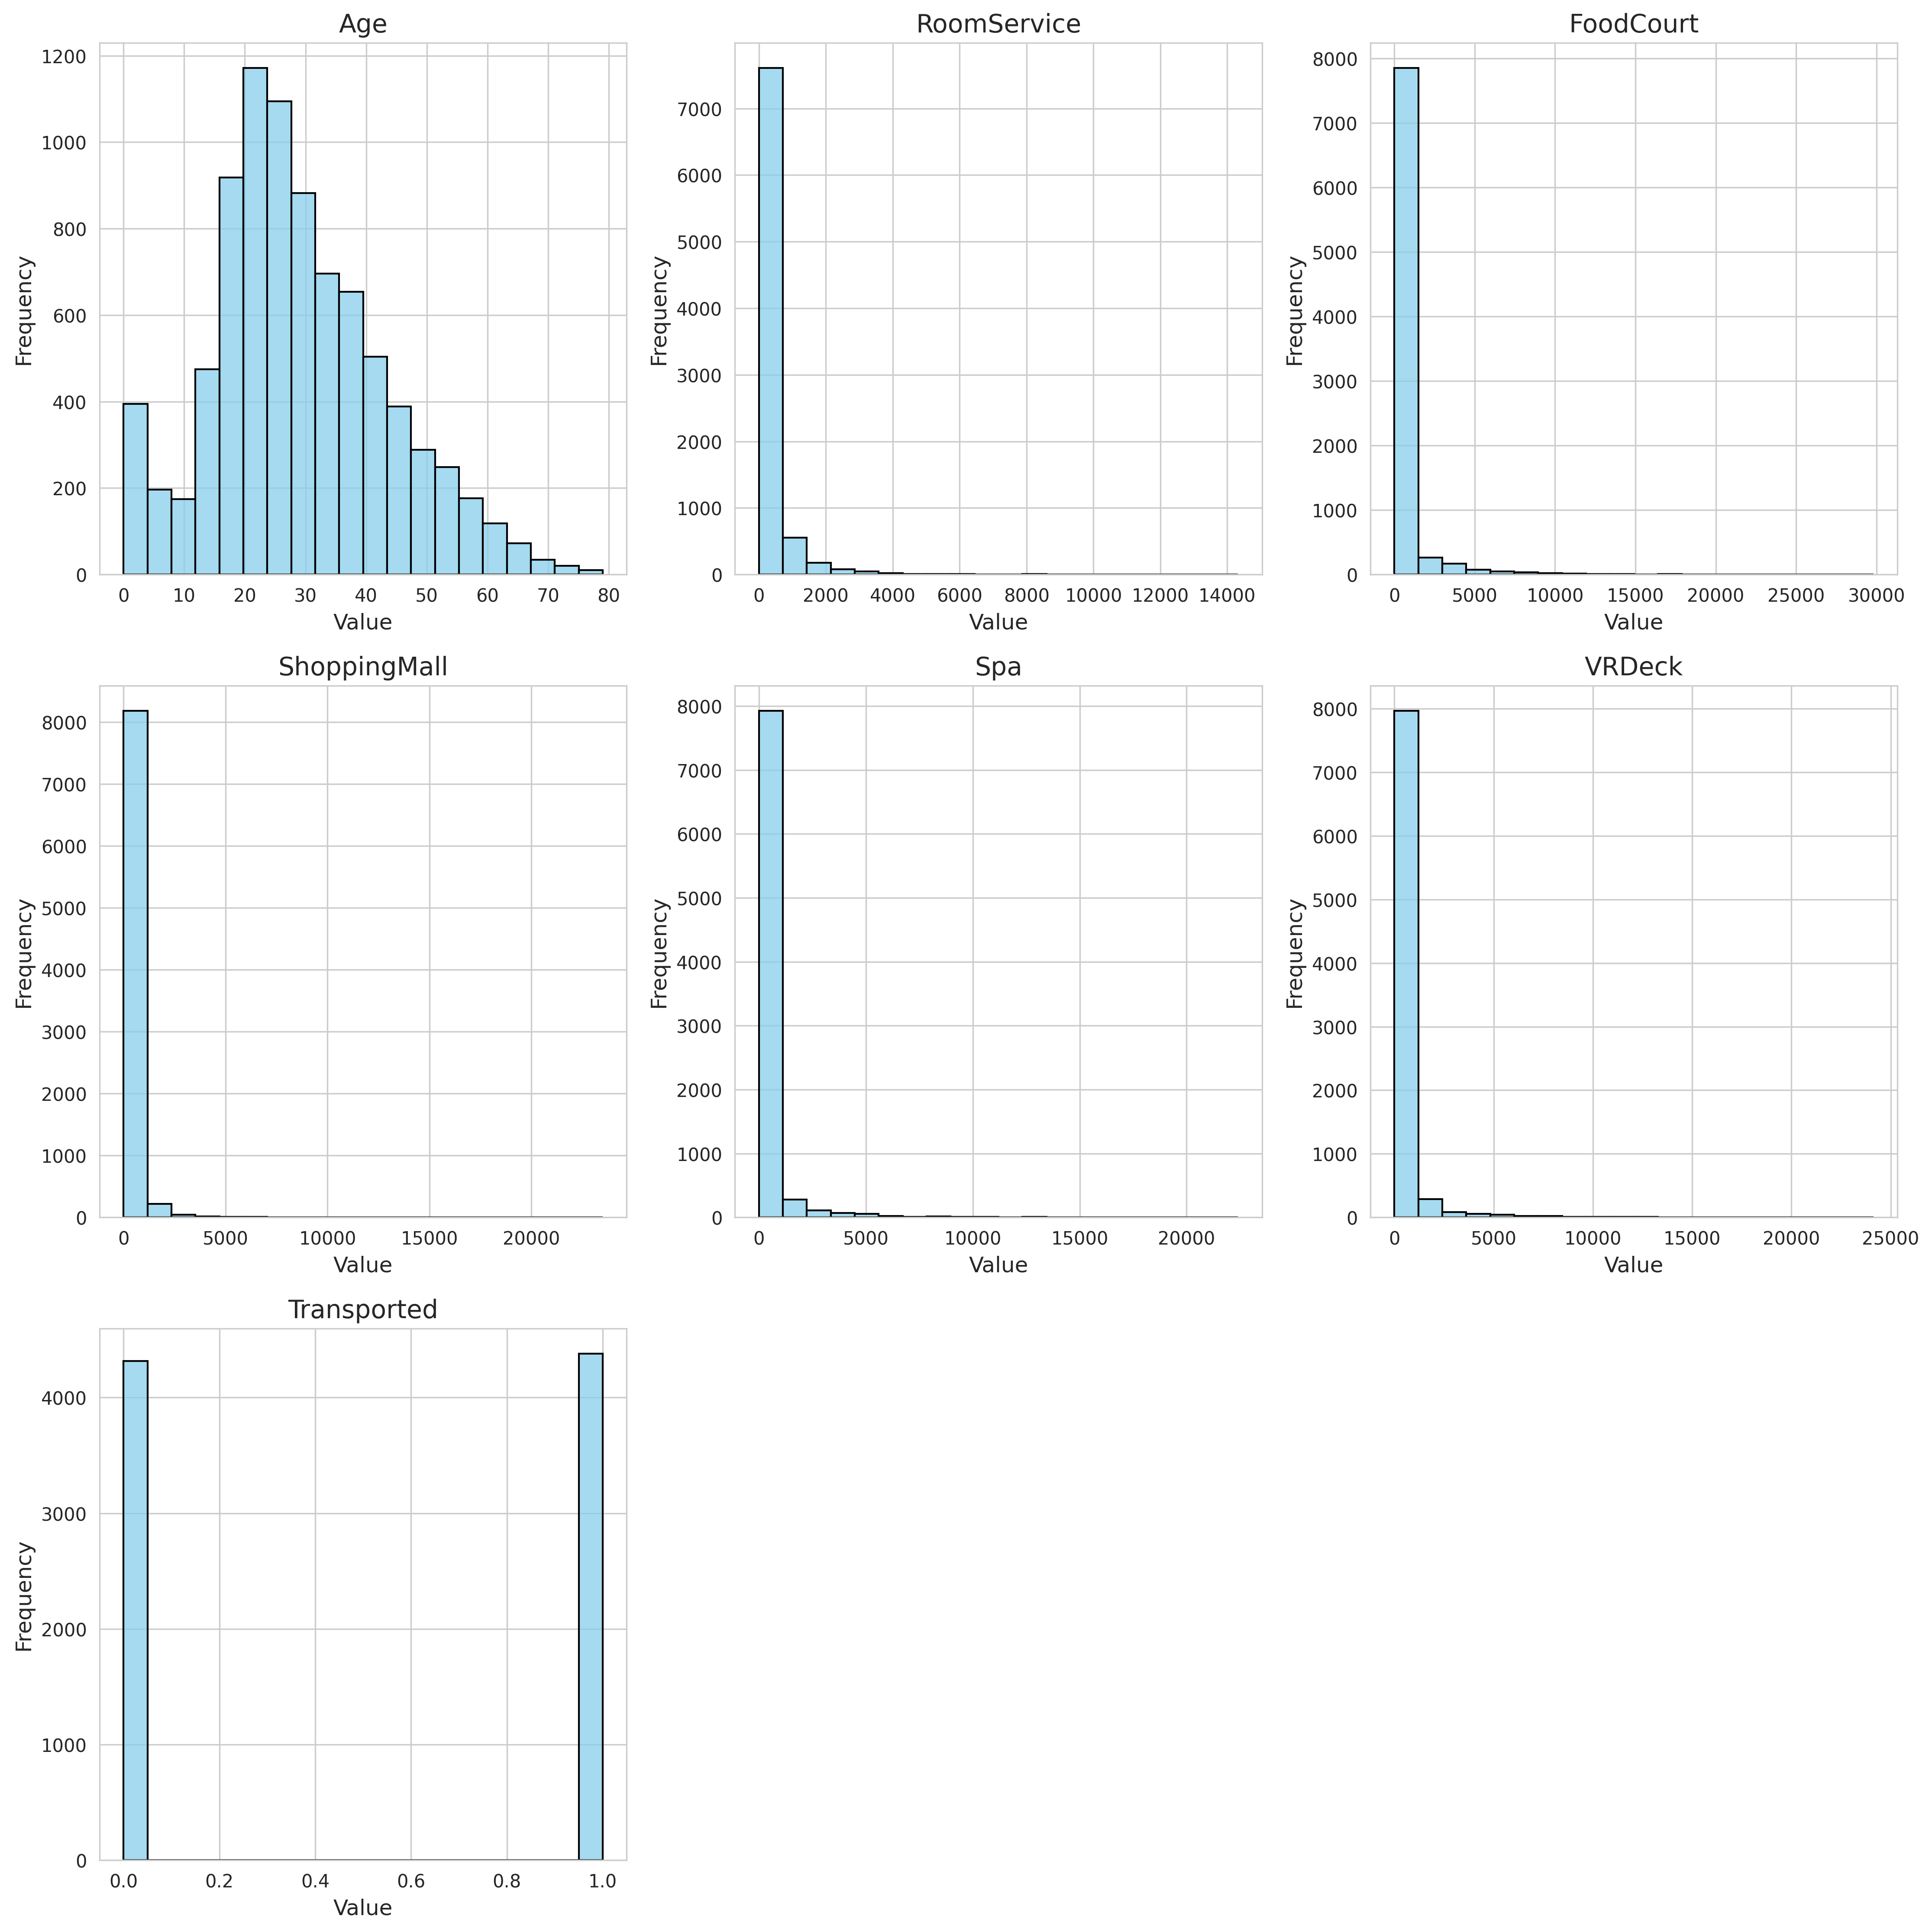

In [ ]:
# Set seaborn style
sns.set_style("whitegrid")

# Convert numerical_variables to list if it's not already a list
numerical_variables = list(numerical_variables)

# Determine the number of rows and columns for subplots
num_vars = len(numerical_variables)
num_cols = 3
num_rows = (num_vars - 1) // num_cols + 1

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

# Plot histograms for each numerical variable
for i, num_col in enumerate(numerical_variables):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df_train[num_col], bins=20, kde=False, ax=axes[row, col], color='skyblue', edgecolor='black')
    axes[row, col].set_title(num_col, fontsize=14)
    axes[row, col].set_xlabel('Value', fontsize=12)
    axes[row, col].set_ylabel('Frequency', fontsize=12)
    axes[row, col].tick_params(axis='both', labelsize=10)

# Remove any empty subplots
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.gcf().set_dpi(300)
plt.show()

# Data Imputation

Approaches to handle None values:

In [ ]:
# Fill the null value with zero for VIP services
df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

In [ ]:
# MICE (Multivariate Imputation by Chained Equations) imputation for Age

# Install the imputation library
!pip install fancyimpute
from fancyimpute import IterativeImputer
from IPython.display import clear_output
clear_output()

# Choose the column to impute
column_data = df_train[['Age']]

# Initialize the MICE imputer
imputer = IterativeImputer()

# Perform imputation on the chosen column
imputed_column = imputer.fit_transform(column_data)

# Replace the missing values in the original DataFrame with imputed values
df_train[['Age']] = imputed_column

In [ ]:
# For Categorical variables replace None values with the most common value in the column
for cat_col in categorical_variables:
    if cat_col!="Name":
        df_train[cat_col] = df_train[cat_col].fillna(df_train[cat_col].mode()[0])

# Drop the Name column from data frame
df_train.drop(['Name'], axis=1, inplace=True)

In [ ]:
# Checking the Null value after data imputation in Numerical and categorical data
get_nulls(df_train)

,#nulls
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


# Feature Engineering

In [ ]:
# Assign the numerical value for features in HomePlanet
df_train["HomePlanet"] = df_train["HomePlanet"].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [ ]:
# Assign the numerical value for features in CryoSleep
unique_cryosleep = df_train["CryoSleep"].unique()
df_train["CryoSleep"] = df_train["CryoSleep"].map(dict(zip(unique_cryosleep,list(range(len(unique_cryosleep)))))).astype(int)
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,0,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,1,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,1,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,0,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [ ]:
# Building the deck and port features from the 'cabin' column
df_train['Deck'] = df_train['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_train['Port'] = df_train['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df_train["Deck"] = df_train["Deck"].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
df_train["Port"] = df_train["Port"].map({'P':0, 'S':1}).astype(int)
df_train.drop(['Cabin'], axis=1, inplace=True)
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [ ]:
# Assign the numerical value for features in Destination
unique_destinations = df_train["Destination"].unique()
df_train["Destination"] = df_train["Destination"].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,0,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,0,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,0,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,0,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,0,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [ ]:
# Assign the numerical value for features in VIP
unique_vip = df_train["VIP"].unique()
df_train["VIP"] = df_train["VIP"].map(dict(zip(unique_vip,list(range(len(unique_vip)))))).astype(int)
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


In [ ]:
# Drop the PassengerId column from data frame
df_train.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
# Save the DataFrame to a CSV file
df_train.to_csv('df_train_cleaned.csv', index=False)

# Modelling

1. Train test split of our training data
2. Fit a few models: Logistic Regression, Random Forest, Gradient Boosting, SVM
3. Plot the results
4. Pick a winner
5. Submit our predictions

1. train test Split

In [ ]:
# Train test split of cleaned training data
X = df_train.drop("Transported", axis=1).values
y = df_train["Transported"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((6954, 12), (6954,), (1739, 12), (1739,))

2. Fit a few models: Logistic Regression, Random Forest, Gradient Boosting

In [ ]:
# Logistic Regression
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_score = lg.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred_score = rf.score(X_test,y_test)

In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred_score = gb.score(X_test,y_test)

In [ ]:
# Support Vector Classification
svc = SVC()
svc.fit(X_train,y_train)
svc_pred_score = svc.score(X_test,y_test)

In [ ]:
# Create the DataFrame to show the result of different ML models
df = pd.DataFrame(dict(model=['Logistic Regression',
                              'Random Forest',
                              'Gradient Boosting',
                              'SVM'],accuracy=[lg_pred_score, rf_pred_score,
                                               gb_pred_score, svc_pred_score]))
df

,model,accuracy
0,Logistic Regression,0.774008
1,Random Forest,0.783784
2,Gradient Boosting,0.785509
3,SVM,0.774008


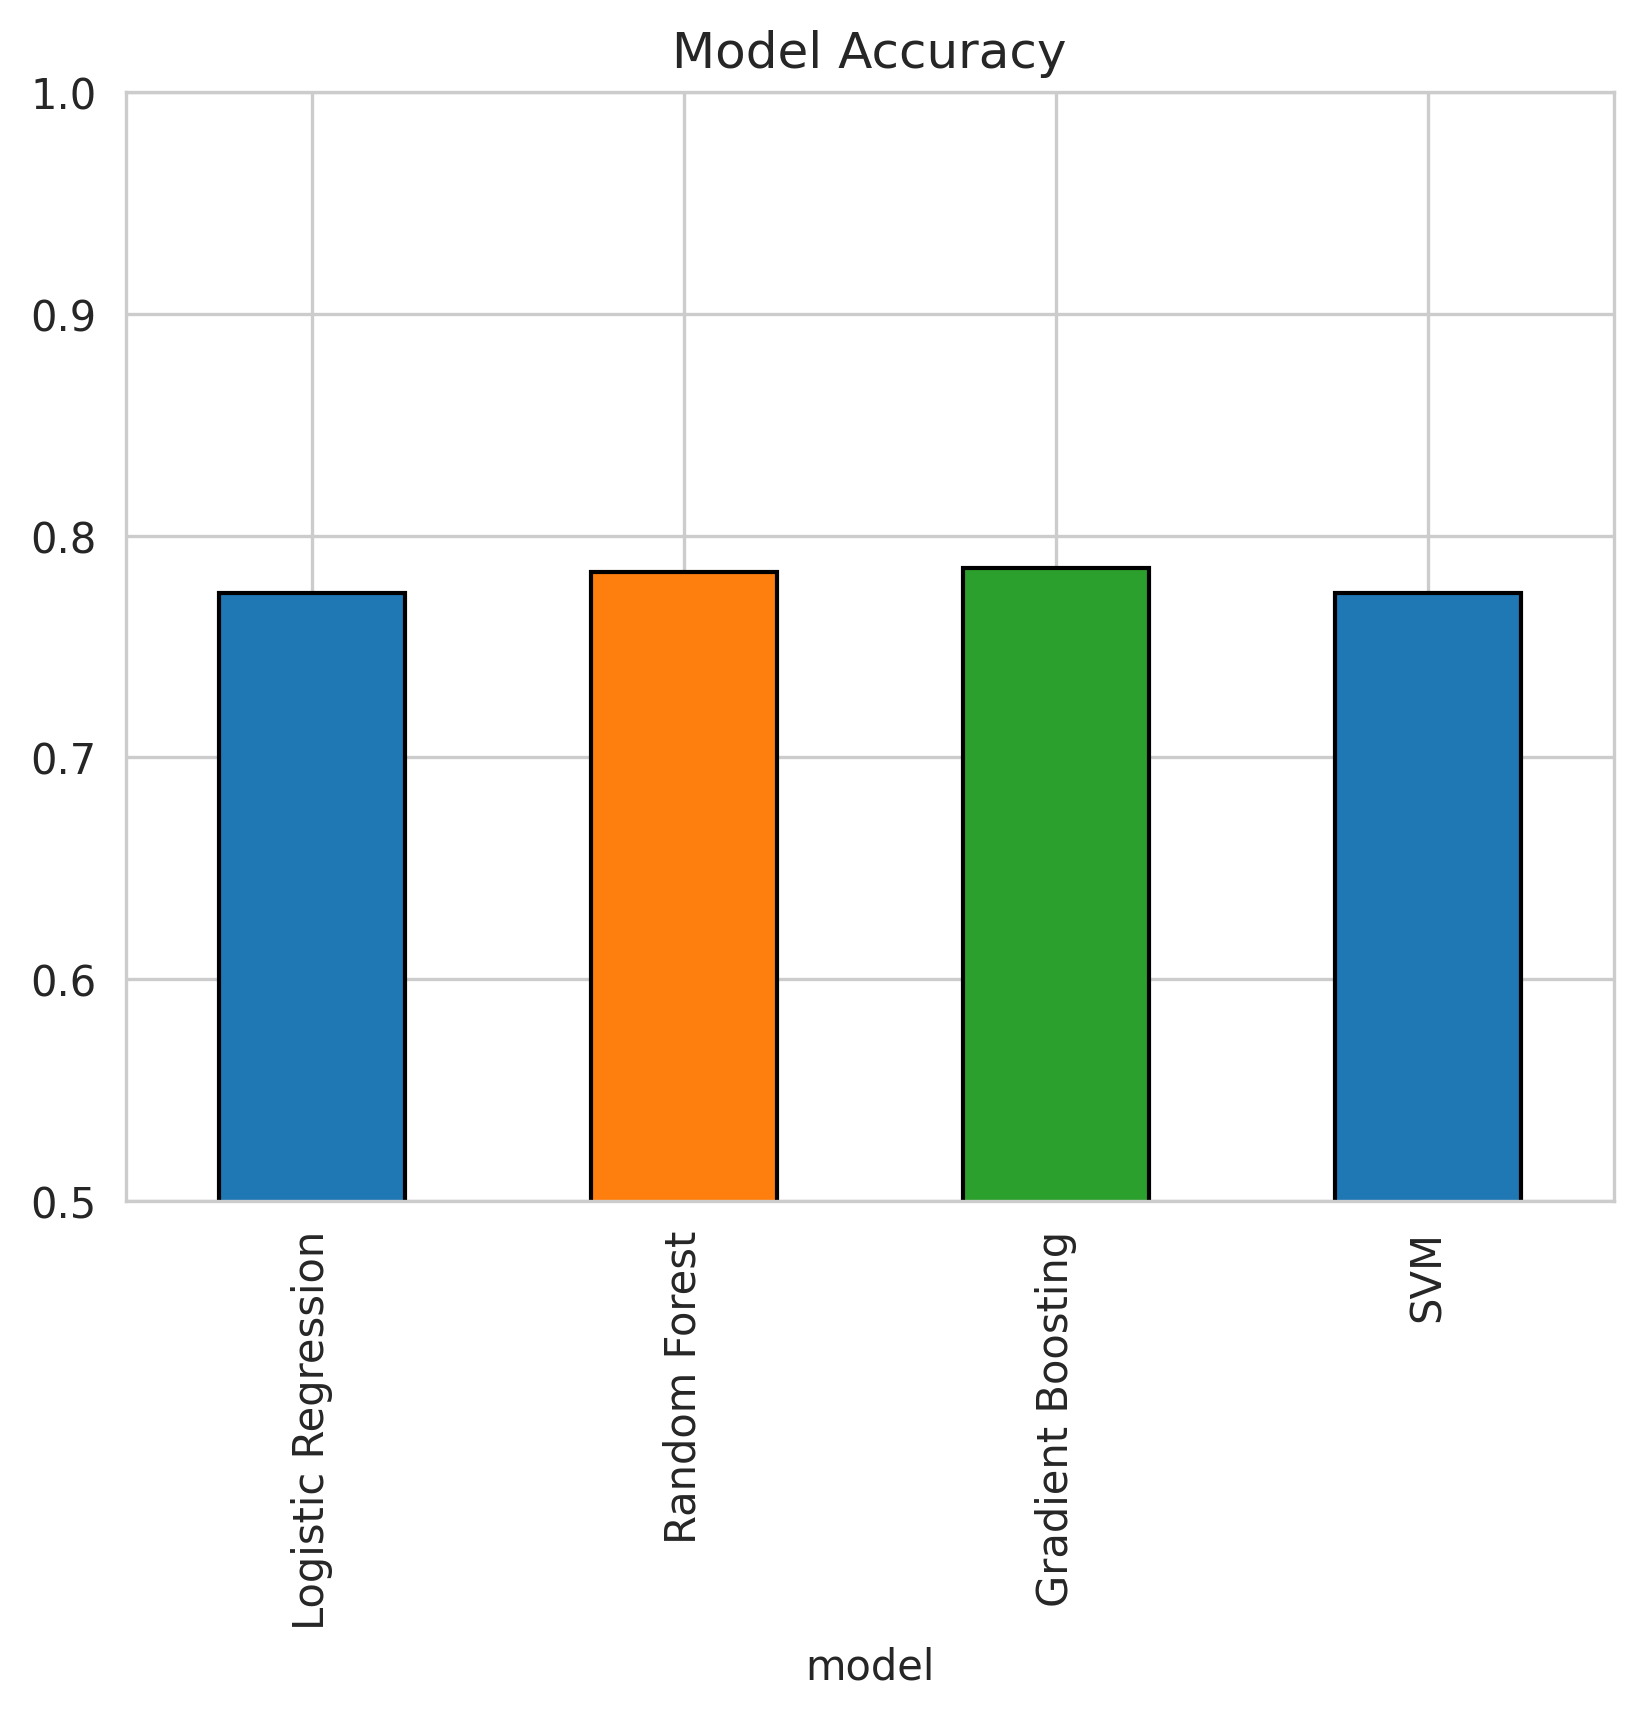

In [ ]:
# Plotting the bar graph to show the models accuracy
df.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'], edgecolor = "black")
plt.ylim(0.5,1)
plt.gcf().set_dpi(300);

#Test preprocessing

In [ ]:
# Approaches to handle None values:
# Fill the null value with zero for VIP services
df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [ ]:
# MICE (Multivariate Imputation by Chained Equations) imputation for Age
# Install the imputation library
!pip install fancyimpute
from fancyimpute import IterativeImputer
from IPython.display import clear_output
clear_output()

# Choose the column to impute
column_data = df_test[['Age']]

# Initialize the MICE imputer
imputer = IterativeImputer()

# Perform imputation on the chosen column
imputed_column = imputer.fit_transform(column_data)

# Replace the missing values in the original DataFrame with imputed values
df_test[['Age']] = imputed_column

In [ ]:
# For Categorical variables replace None values with the most common value in the column
for cat_col in categorical_variables:
  if cat_col!="Name":
    df_test[cat_col] = df_test[cat_col].fillna(df_test[cat_col].mode()[0])

# Drop the Name column from data frame
df_test.drop(['Name'], axis=1, inplace=True)

In [ ]:
# Checking the Null value after data imputation in Numerical and categorical data
get_nulls(df_test)

,#nulls
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [ ]:
# Assign the numerical value for features in HomePlanet
df_test["HomePlanet"] = df_test["HomePlanet"].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [ ]:
# Assign the numerical value for features in CryoSleep
unique_cryosleep = df_test["CryoSleep"].unique()
df_test["CryoSleep"] = df_test["CryoSleep"].map(dict(zip(unique_cryosleep,list(range(len(unique_cryosleep)))))).astype(int)
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,0,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,1,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,0,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,1,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,1,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [ ]:
# Building the deck and port features from the 'cabin' column
df_test['Deck'] = df_test['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_test['Port'] = df_test['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df_test["Deck"] = df_test["Deck"].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
df_test["Port"] = df_test["Port"].map({'P':0, 'S':1}).astype(int)
df_test.drop(['Cabin'], axis=1, inplace=True)
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Port
0,0013_01,0,0,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,3,1
1,0018_01,0,1,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,1,1
2,0019_01,1,0,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,6,1
3,0021_01,1,1,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,6,1
4,0023_01,0,1,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,1,1


In [ ]:
# Assign the numerical value for features in Destination
unique_destinations = df_test["Destination"].unique()
df_test["Destination"] = df_test["Destination"].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Port
0,0013_01,0,0,0,27.0,False,0.0,0.0,0.0,0.0,0.0,3,1
1,0018_01,0,1,0,19.0,False,0.0,9.0,0.0,2823.0,0.0,1,1
2,0019_01,1,0,1,31.0,False,0.0,0.0,0.0,0.0,0.0,6,1
3,0021_01,1,1,0,38.0,False,0.0,6652.0,0.0,181.0,585.0,6,1
4,0023_01,0,1,0,20.0,False,10.0,0.0,635.0,0.0,0.0,1,1


In [ ]:
# Assign the numerical value for features in VIP
unique_vip = df_test["VIP"].unique()
df_test["VIP"] = df_test["VIP"].map(dict(zip(unique_vip,list(range(len(unique_vip)))))).astype(int)
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Port
0,0013_01,0,0,0,27.0,0,0.0,0.0,0.0,0.0,0.0,3,1
1,0018_01,0,1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,1
2,0019_01,1,0,1,31.0,0,0.0,0.0,0.0,0.0,0.0,6,1
3,0021_01,1,1,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,6,1
4,0023_01,0,1,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,1


In [ ]:
# Drop the PassengerId column from data frame
df_test.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
# Save the DataFrame to a CSV file
df_test.to_csv('df_test_cleaned.csv', index=False)

In [ ]:
# Prediction
#X = df_train.drop("Transported", axis=1).values
y_pred = gb.predict(df_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



In [ ]:
y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
# Create the DataFrame for predicted value
df_pred = pd.DataFrame(y_pred).astype(int)

In [ ]:
'''# Prediction
y_pred = model.predict(X_test)

# Create the DataFrame for predicted value
df_pred = pd.DataFrame(y_pred).astype(int)'''

'# Prediction\ny_pred = model.predict(X_test)\n\n# Create the DataFrame for predicted value\ndf_pred = pd.DataFrame(y_pred).astype(int)'

In [ ]:
# Assign column name
df_pred.columns = ['Transported']

In [ ]:
# Replave the 0 and 1 value to False and True
df_pred['Transported'].replace([0,1],[False,True],inplace=True)

# Merge the predicted DataFrame with PassengerId
df_pred = pd.concat([df_test1['PassengerId'], df_pred],axis=1)

In [ ]:
# Save the DataFrame to a CSV file
df_pred.to_csv('submission-1.csv', index=False)

In [ ]:
print(df_pred)

     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]


In [ ]:
df_submission = pd.DataFrame({'PassengerId':df_test1['PassengerId'], 'Transported':y_pred})

In [ ]:
print(df_submission)

     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]


In [ ]:
df_submission.to_csv('submission-2.csv', index=False)